Задание №3:Вариант 26, но только явная схема

1) Подключение numpy и pandas.Пригодится :)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
a=0.025
f=lambda t,x:-9*t**2+6*x*t-a*(-24*x**2+np.e**x)
#ddf=lambda x:48*a+np.e**x
mu=lambda x:-2*x**4+np.e**x
mu_1=lambda t:-3*t**3+1
mu_2=lambda t:-2-3*t**3+3*t**2+np.e
u=lambda t,x:-2*x**4-3*t**3+3*t**2*x+np.e**x

3) Построение значений на сетке

In [ ]:
def all_layers(u_0,u_l,u_r,tau,h,a):
  n_t=int(1/tau)
  n_x=int(1/h)
  u_j=[u_0(i*h) for i in range(0,n_x+1)]
  U=[u_j]
  for j in range(1,n_t+1):
    u=[u_l(j*tau)]
    for k in range(1,n_x):
      u.append(u_j[k]+a*tau*(u_j[k+1]-2*u_j[k]+u_j[k-1])/h**2+tau*f((j-1)*tau,k*h))
    u.append(u_r(j*tau))
    u_j=u
    U.append(u_j)
  return U

4) Построение таблицы ошибок при разных $h$  и $\tau$.

In [ ]:
def max_error(u_0,u_l,u_r,tau,h,a,u_true):
  U=all_layers(u_0,u_l,u_r,tau,h,a)
  mm=-1
  for i in range(len(U)):
     for j in range(len(U[i])):
       m=abs(U[i][j]-u_true(i*tau,j*h))
       if m>mm:
          #print(m)
          mm=m
  return mm

HH=[0.1,0.05,0.001]
TAU=[0.1,0.05,0.001]
A=[]
for j in HH:
  B=[]
  for i in TAU:
     B.append(max_error(mu,mu_1,mu_2,i,j,a,u))
  A.append(B)

Table=pd.DataFrame({"tau\h":["0.1","0.01","0.001"],"0.1":A[0],"0.05":A[1],"0.001":A[2]})
Table

,tau\h,0.1,0.05,0.001
0,0.1,0.331320,8.367390,7.275969e+32
1,0.01,0.167556,0.170452,1.728842e+66
2,0.001,0.002531,0.003232,inf


Схема не устойчива, должно выполняться условие $\tau<\frac{h^2}{2a^2} $ для устойчивости.

5) Построение графика функции при конкретном $x=0.5$, при $\tau=0.001 , h=0.1$.

---



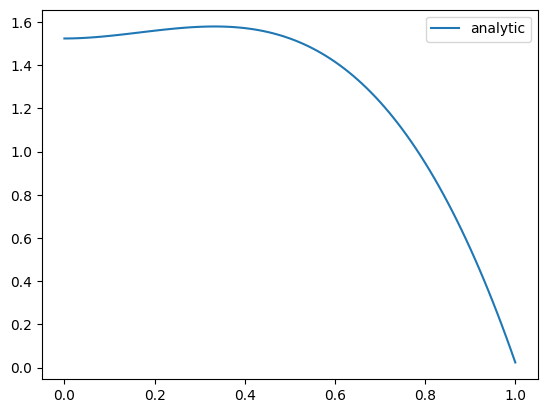

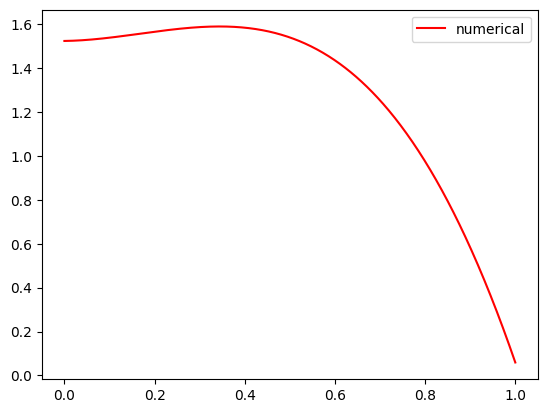

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig1, ax1 = plt.subplots()
ax.plot( [i/100 for i in range(100+1)],[u(i/100,0.5) for i in range(100+1)],label="analytic")
ax1.plot([i/1000 for i in range(1000+1)],np.array(all_layers(mu,mu_1,mu_2,0.001,0.1,0.018))[:,5],color="red",label="numerical")
ax.legend()
ax1.legend()

8) Построение 3-х мерного графика.

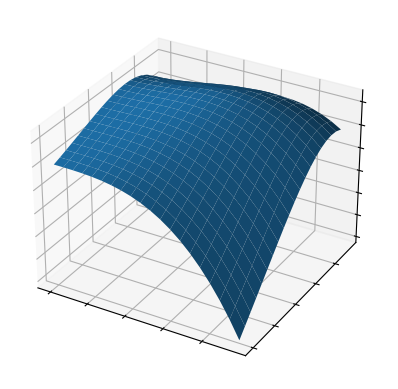

In [ ]:

X = np.arange(0, 1, 0.05)
T = np.arange(0, 1, 0.05)
X, T = np.meshgrid(X, T)
Z =u(X,T)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, T, Z, vmin=Z.min() * 2)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()
